In [13]:
import ROOT
import datetime
import os
import sys
import numpy as np
from IPython.display import Image as Plot
def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

#Good res
g_xres = 1000
g_yres = 500
        
sys.path.insert(0, os.environ.get('PROJDIR_RATEANA'))
fermilabOffset = -6*60*60
ROOT.gStyle.SetTimeOffset(fermilabOffset);
ROOT.gStyle.SetPalette(ROOT.kRainBow);
ROOT.gStyle.SetOptStat(0)
outDir = 'Plots/'
extension = '.png'

startTime = ROOT.TDatime(2016,1,1,0,0,0).Convert()
endTime = ROOT.TDatime(2016,6,1,0,0,0).Convert()
stepSize = 24*60*60
nSteps = (endTime - startTime)/stepSize

# Number of datapoints saved on the archiver per day

Mainly HV variables here

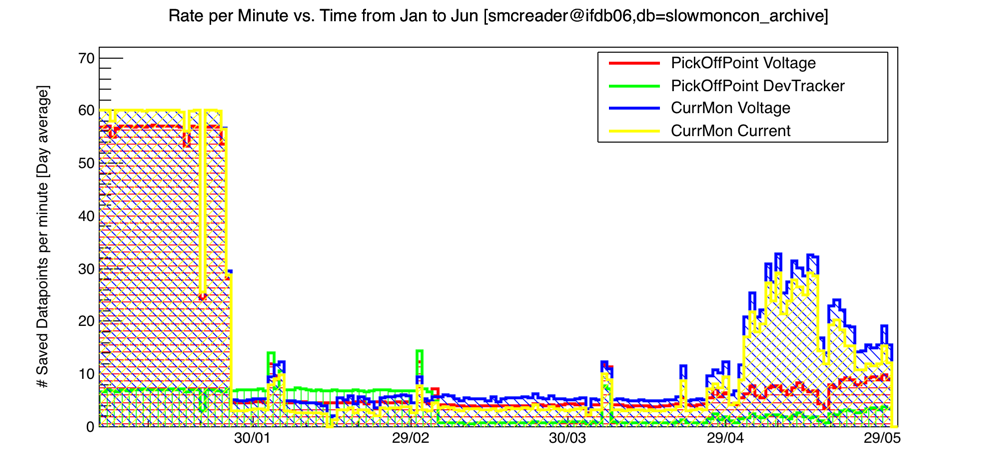

In [17]:
# Setup
perRate = 24*60 # As in number per hour, per minute or per second

dataDir = ['Data/uB_TPCDrift_HV01_keithleyPickOff_getVoltage_160101_160601_86400s.dat',
           'Data/uB_TPCDrift_HV01_keithleyPickOff_voltDiff5s60s_160101_160601_86400s.dat',
           'Data/uB_TPCDrift_HV01_keithleyCurrMon_getVoltage_160101_160601_86400s.dat',
           'Data/uB_TPCDrift_HV01_keithleyCurrMon_calcCurrent_160101_160601_86400s.dat']

legEntry = ["PickOffPoint Voltage",
            "PickOffPoint DevTracker",
            "CurrMon Voltage",
            "CurrMon Current"]

fillStyle = [3305,3395,3345,3354]

plotName = 'hHvRate'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
c2 = ROOT.TCanvas(plotName+str(2),"",g_xres,g_yres)
ROOT.gStyle.SetHatchesSpacing(0.8)
ROOT.gStyle.SetHatchesLineWidth(1)

# Extract data
data = [0]*len(dataDir)
h = [0]*len(dataDir)
for i in range(len(dataDir)):
    data[i] = np.genfromtxt(dataDir[i],delimiter=" ",names=True,dtype=None)

# Find max
tmax = []
for row in data:
    tmax.append(max(row['Rate']))
fmax = max(row['Rate'])/perRate

# Plot
for i in range(len(dataDir)):
    h[i] = ROOT.TH1D("h"+str(i),"Rate per Minute vs. Time from Jan to Jun [smcreader@ifdb06,db=slowmoncon_archive];;# Saved Datapoints per minute [Day average]",nSteps,startTime,endTime)
    h[i].GetXaxis().SetTimeDisplay(1)
#     h[i].GetXaxis().SetNdivisions(10,0)
    h[i].GetYaxis().SetRangeUser(0,fmax*1.2)
    h[i].GetYaxis().CenterTitle()
    h[i].SetLineColor(i+2)
    h[i].SetFillColor(i+2)
    h[i].SetLineWidth(3)
    h[i].SetFillStyle(fillStyle[i])

    for j in range(len(data[i])):
        h[i].SetBinContent(h[i].FindBin(data[i]['Timestamp'][j]),data[i]['Rate'][j]/perRate)

c1.cd()
leg = ROOT.TLegend(0.6,0.7,0.89,0.89)    
h[0].Draw("F2")
for i in range(len(dataDir)):
    h[i].Draw("SAME")
    leg.AddEntry(h[i],legEntry[i],"l")
leg.Draw()
c1.SaveAs(outDir+plotName+extension)

c2.Divide(2,2)
for i in range(len(dataDir)):
    c2.cd(i+1)
    h[i].Draw("")
c2.SaveAs(outDir+plotName+str(2)+extension)

# Finalize
destruct(c1)
destruct(c2)
for i in range(len(dataDir)):
    destruct(h[i])
Plot(outDir+plotName+extension)

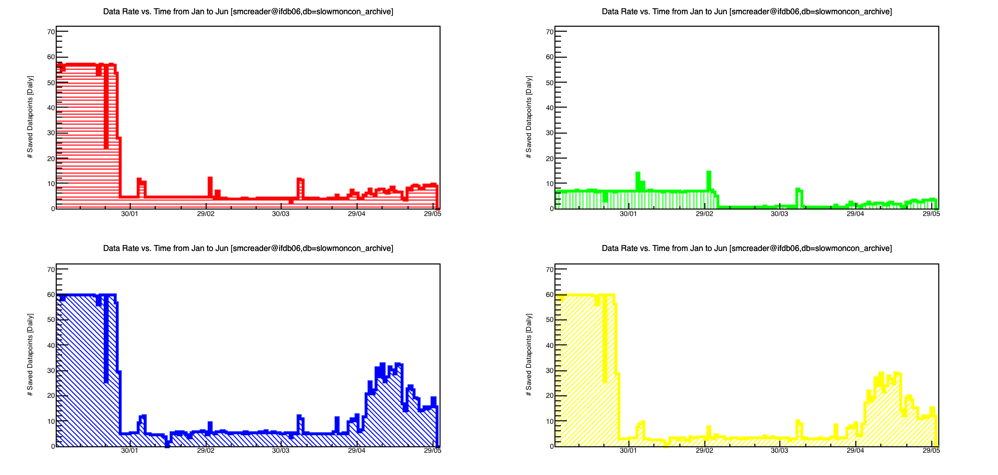

In [15]:
Plot(outDir+plotName+str(2)+extension)

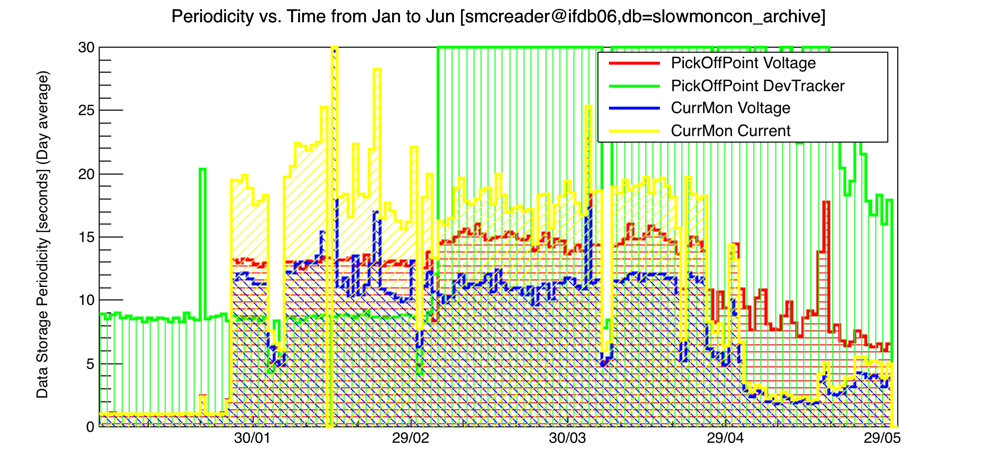

In [31]:
# Setup
perRate = 24*60*60 # As in number per hour, per minute or per second

dataDir = ['Data/uB_TPCDrift_HV01_keithleyPickOff_getVoltage_160101_160601_86400s.dat',
           'Data/uB_TPCDrift_HV01_keithleyPickOff_voltDiff5s60s_160101_160601_86400s.dat',
           'Data/uB_TPCDrift_HV01_keithleyCurrMon_getVoltage_160101_160601_86400s.dat',
           'Data/uB_TPCDrift_HV01_keithleyCurrMon_calcCurrent_160101_160601_86400s.dat']

legEntry = ["PickOffPoint Voltage",
            "PickOffPoint DevTracker",
            "CurrMon Voltage",
            "CurrMon Current"]

fillStyle = [3305,3395,3345,3354]

plotName = 'hHvFrequency'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
c2 = ROOT.TCanvas(plotName+str(2),"",g_xres,g_yres)
ROOT.gStyle.SetHatchesSpacing(0.8)
ROOT.gStyle.SetHatchesLineWidth(1)

# Extract data
data = [0]*len(dataDir)
h = [0]*len(dataDir)
for i in range(len(dataDir)):
    data[i] = np.genfromtxt(dataDir[i],delimiter=" ",names=True,dtype=None)

# Find max
tmax = []
for row in data:
    tmax.append(max(row['Rate']))
fmax = 30

# Plot
for i in range(len(dataDir)):
    h[i] = ROOT.TH1D("h"+str(i),"Periodicity vs. Time from Jan to Jun [smcreader@ifdb06,db=slowmoncon_archive];; Data Storage Periodicity [seconds] (Day average)",nSteps,startTime,endTime)
    h[i].GetXaxis().SetTimeDisplay(1)
#     h[i].GetXaxis().SetNdivisions(10,0)
    h[i].GetYaxis().SetRangeUser(0,30)
    h[i].GetYaxis().CenterTitle()
    h[i].SetLineColor(i+2)
    h[i].SetFillColor(i+2)
    h[i].SetLineWidth(3)
    h[i].SetFillStyle(fillStyle[i])

    for j in range(len(data[i])):
        if(data[i]['Rate'][j]!=0): h[i].SetBinContent(h[i].FindBin(data[i]['Timestamp'][j]),perRate/float(data[i]['Rate'][j]))

c1.cd()
leg = ROOT.TLegend(0.6,0.7,0.89,0.89)    
h[0].Draw("F2")
for i in range(len(dataDir)):
    h[i].Draw("SAME")
    leg.AddEntry(h[i],legEntry[i],"l")
leg.Draw()
c1.SaveAs(outDir+plotName+extension)

c2.Divide(2,2)
for i in range(len(dataDir)):
    c2.cd(i+1)
    h[i].Draw("")
c2.SaveAs(outDir+plotName+str(2)+extension)

# Finalize
destruct(c1)
destruct(c2)
for i in range(len(dataDir)):
    destruct(h[i])
Plot(outDir+plotName+extension)

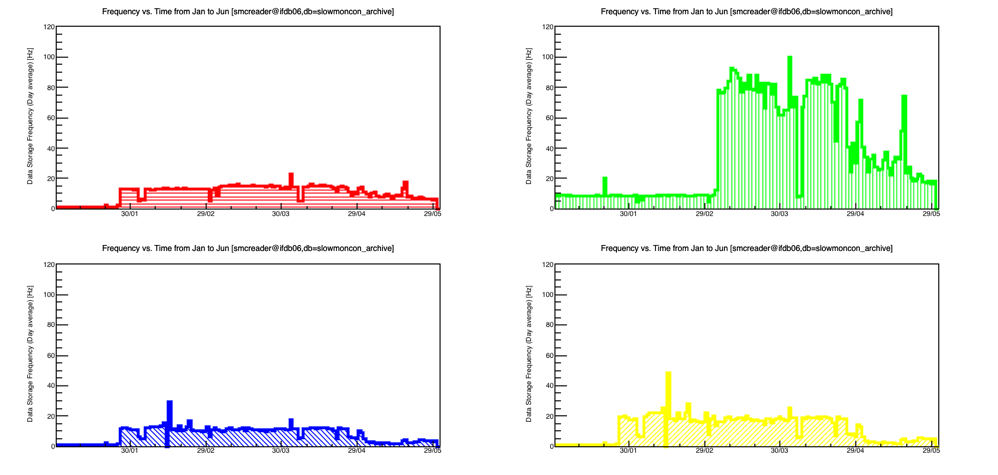

In [27]:
Plot(outDir+plotName+str(2)+extension)